In [6]:
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()

# words = ["running", "runs", "ran"]

# for word in words:
#     lemma = lemmatizer.lemmatize(word,pos='v')  # Specify the part of speech (verb)
#     print(f"{word} -> {lemma}")


In [21]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\CHIRAG H
[nltk_data]     DEVADIGA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\CHIRAG H
[nltk_data]     DEVADIGA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
import pandas as pd

data=pd.read_csv('Resources/ngram_tweets.csv',usecols=['text'])
data.head(10)

,text
0,LOSER! https://t.co/p5imhMJqS1
1,Most of the money raised by the RINO losers of...
2,....because they don’t know how to win and the...
3,....lost for Evan “McMuffin” McMullin (to me)....
4,....get even for all of their many failures. Y...
5,Cryin Chuck Schumer compared to what other Sen...
6,They are Fake News Losers! https://t.co/3RHcBZ...
7,The Wall Street Journal Editorial Board doesn’...
8,Pocahontas working in conjunction with the Dem...
9,Elizabeth “Pocahontas” Warren other than Mini ...


In [23]:
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

In [24]:
lem=WordNetLemmatizer()

sw=stopwords.words('english')

words=data['text'].to_list()

In [25]:
words

['LOSER! https://t.co/p5imhMJqS1',
 'Most of the money raised by the RINO losers of the so-called “Lincoln Project” goes into their own pockets. With what I’ve done on Judges Taxes Regulations Healthcare the Military Vets (Choice!) &amp; protecting our great 2A they should love Trump. Problem is I BEAT THEM ALL!',
 '....because they don’t know how to win and their so-called Lincoln Project is a disgrace to Honest Abe. I don’t know what Kellyanne did to her deranged loser of a husband Moonface but it must have been really bad. John Weaver lost big for Kasich (to me). Crazed Rick Wilson....',
 '....lost for Evan “McMuffin” McMullin (to me). Steve Schmidt &amp; Reed Galvin lost for John McCain Romney’s campaign manager (?) lost big to “O” &amp; Jennifer Horn got thrown out of the New Hampshire Republican Party. They’re all LOSERS but Abe Lincoln Republican is all smiles!',
 '....get even for all of their many failures. You see these loser types don’t care about 252 new Federal Judges 2 gr

In [26]:
words=" ".join([i.lower() for i in words])
words

'loser! https://t.co/p5imhmjqs1 most of the money raised by the rino losers of the so-called “lincoln project” goes into their own pockets. with what i’ve done on judges taxes regulations healthcare the military vets (choice!) &amp; protecting our great 2a they should love trump. problem is i beat them all! ....because they don’t know how to win and their so-called lincoln project is a disgrace to honest abe. i don’t know what kellyanne did to her deranged loser of a husband moonface but it must have been really bad. john weaver lost big for kasich (to me). crazed rick wilson.... ....lost for evan “mcmuffin” mcmullin (to me). steve schmidt &amp; reed galvin lost for john mccain romney’s campaign manager (?) lost big to “o” &amp; jennifer horn got thrown out of the new hampshire republican party. they’re all losers but abe lincoln republican is all smiles! ....get even for all of their many failures. you see these loser types don’t care about 252 new federal judges 2 great supreme court

In [27]:
import re

In [28]:
words=re.sub('[^\w\s]','',words).split()
words=[lem.lemmatize(i) for i in words if not i in sw]
words

['loser',
 'httpstcop5imhmjqs1',
 'money',
 'raised',
 'rino',
 'loser',
 'socalled',
 'lincoln',
 'project',
 'go',
 'pocket',
 'ive',
 'done',
 'judge',
 'tax',
 'regulation',
 'healthcare',
 'military',
 'vet',
 'choice',
 'amp',
 'protecting',
 'great',
 '2a',
 'love',
 'trump',
 'problem',
 'beat',
 'dont',
 'know',
 'win',
 'socalled',
 'lincoln',
 'project',
 'disgrace',
 'honest',
 'abe',
 'dont',
 'know',
 'kellyanne',
 'deranged',
 'loser',
 'husband',
 'moonface',
 'must',
 'really',
 'bad',
 'john',
 'weaver',
 'lost',
 'big',
 'kasich',
 'crazed',
 'rick',
 'wilson',
 'lost',
 'evan',
 'mcmuffin',
 'mcmullin',
 'steve',
 'schmidt',
 'amp',
 'reed',
 'galvin',
 'lost',
 'john',
 'mccain',
 'romneys',
 'campaign',
 'manager',
 'lost',
 'big',
 'amp',
 'jennifer',
 'horn',
 'got',
 'thrown',
 'new',
 'hampshire',
 'republican',
 'party',
 'theyre',
 'loser',
 'abe',
 'lincoln',
 'republican',
 'smile',
 'get',
 'even',
 'many',
 'failure',
 'see',
 'loser',
 'type',
 'dont',


In [31]:
import matplotlib.pyplot as plt


In [36]:
def graph(k):
    ngram=nltk.ngrams(words, k)
    pr=pd.Series(ngram).value_counts()
    print(pr[:15])
    pr[:15].plot.bar()
    plt.title(f' Top 15 frequently occuring ngrams for k={k}')
    plt.ylabel("Frequency of each ngrams")
    plt.xlabel("ngrams")
    plt.show()
    
    

(hater, amp, loser)             10
(separate, winner, loser)        8
(new, twist, fate)               6
(reacts, new, twist)             6
(person, reacts, new)            6
(loser, person, reacts)          6
(winner, loser, person)          6
(hater, loser, happy)            6
(ego, ill, show)                 5
(ill, show, loser)               5
(including, hater, loser)        5
(everyone, including, hater)     5
(without, ego, ill)              5
(stone, cold, loser)             4
(trying, mike, ditka)            4
Name: count, dtype: int64


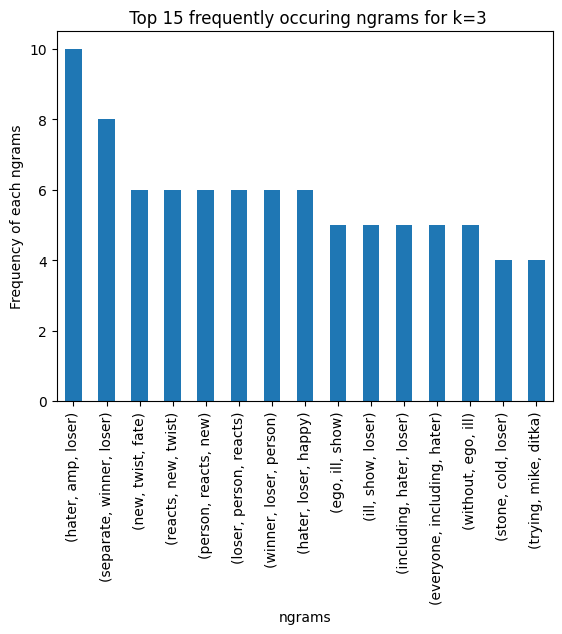

In [37]:
graph(3)

(hater, loser)        42
(total, loser)        32
(loser, hater)        14
(amp, loser)          13
(donald, trump)       11
(hater, amp)          11
(separate, winner)     8
(winner, loser)        8
(loser, like)          6
(loser, happy)         6
(wear, wig)            6
(loser, person)        6
(person, reacts)       6
(reacts, new)          6
(new, twist)           6
Name: count, dtype: int64


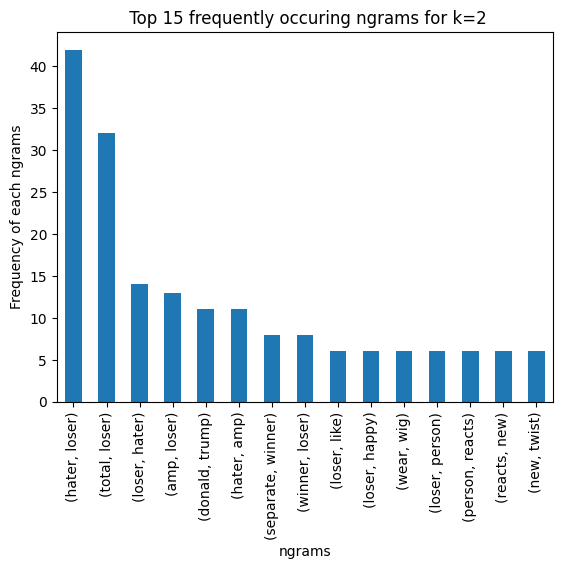

In [38]:
graph(2)